In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib numpy

In [ ]:
# Load in supplementary data and sample game rows.

import pandas as pd

supp = pd.read_csv('114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')

pa_plays = supp[
    (supp['pass_result'].isin(['I'])) &
    (supp['play_nullified_by_penalty'] == 'N') &
    (supp['visitor_team_abbr'] == 'CIN') &
    (supp['home_team_abbr'] == 'CLE')
]

pa_plays[[
    'season', 'week', 'game_id', 'play_id', 'possession_team', 'defensive_team',
    'play_description', 'pass_result', 'team_coverage_man_zone'
]].head(30)

C:\Users\Xavier Njoku\AppData\Local\Temp\ipykernel_27808\3027455290.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supp = pd.read_csv('114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')


season  week     game_id  play_id possession_team defensive_team  \
141    2023     1  2023091002      599             CLE            CIN   
142    2023     1  2023091002     1260             CLE            CIN   
143    2023     1  2023091002     2942             CIN            CLE   
148    2023     1  2023091002     1832             CLE            CIN   
150    2023     1  2023091002     2039             CLE            CIN   
151    2023     1  2023091002     1540             CLE            CIN   
152    2023     1  2023091002     2517             CIN            CLE   
154    2023     1  2023091002     3812             CIN            CLE   
159    2023     1  2023091002     3594             CIN            CLE   
161    2023     1  2023091002     1412             CIN            CLE   
162    2023     1  2023091002     3138             CLE            CIN   
163    2023     1  2023091002     1974             CIN            CLE   
164    2023     1  2023091002     1071             CIN            CLE   
166    2023     1  2023091002     2441             CLE            CIN   
168    2023     1  2023091002     2211             CLE            CIN   
172    2023     1  2023091002      975             CLE            CIN   
174    2023     1  2023091002     3314             CIN            CLE   
175    2023     1  2023091002     1048             CIN            CLE   
176    2023     1  2023091002      444             CIN            CLE   
177    2023     1  2023091002     3571             CIN            CLE   
183    2023     1  2023091002     4036             CIN            CLE   

                                      play_description pass_result  \
141  (5:13) (Shotgun) Direct snap to N.Chubb.  D.Wa...           I   
142  (12:13) (Shotgun) D.Watson pass incomplete dee...           I   
143  (7:02) (Shotgun) J.Burrow pass incomplete deep...           I   
148  (2:19) (Shotgun) D.Watson pass incomplete deep...           I   
150  (:56) (No Huddle, Shotgun) D.Watson pass incom...           I   
151  (6:45) D.Watson pass incomplete deep right to ...           I   
152  (12:51) (Shotgun) J.Burrow pass incomplete sho...           I   
154  (8:32) (Shotgun) J.Burrow pass incomplete deep...           I   
159  (11:24) (Shotgun) J.Burrow pass incomplete sho...           I   
161  (8:52) (Shotgun) J.Burrow pass incomplete deep...           I   
162  (3:12) (Shotgun) D.Watson pass incomplete shor...           I   
163  (1:48) (Shotgun) J.Burrow pass incomplete deep...           I   
164  (14:07) (Shotgun) J.Burrow pass incomplete sho...           I   
166  (13:41) (Shotgun) D.Watson pass incomplete sho...           I   
168  (:26) (Shotgun) D.Watson pass incomplete short...           I   
172  (14:23) (Shotgun) D.Watson pass incomplete sho...           I   
174  (:26) (Shotgun) J.Burrow pass incomplete deep ...           I   
175  (14:12) (Shotgun) J.Burrow pass incomplete sho...           I   
176  (7:13) (Shotgun) J.Burrow pass incomplete shor...           I   
177  (11:29) (Shotgun) J.Burrow pass incomplete sho...           I   
183  (3:52) (Shotgun) J.Browning pass incomplete sh...           I   

    team_coverage_man_zone  
141          ZONE_COVERAGE  
142           MAN_COVERAGE  
143           MAN_COVERAGE  
148          ZONE_COVERAGE  
150          ZONE_COVERAGE  
151          ZONE_COVERAGE  
152          ZONE_COVERAGE  
154           MAN_COVERAGE  
159          ZONE_COVERAGE  
161           MAN_COVERAGE  
162          ZONE_COVERAGE  
163           MAN_COVERAGE  
164           MAN_COVERAGE  
166           MAN_COVERAGE  
168          ZONE_COVERAGE  
172           MAN_COVERAGE  
174          ZONE_COVERAGE  
175          ZONE_COVERAGE  
176           MAN_COVERAGE  
177          ZONE_COVERAGE  
183          ZONE_COVERAGE

In [ ]:
row = pa_plays.iloc[20] # Selected row

week = int(row['week'])
game_id = int(row['game_id'])
play_id = int(row['play_id'])
play_description = str(row['play_description'])
season = int(row['season'])

row[['week', 'game_id', 'play_id', 'play_description']]

week                                                                1
game_id                                                    2023091002
play_id                                                          4036
play_description    (3:52) (Shotgun) J.Browning pass incomplete sh...
Name: 183, dtype: object

In [ ]:
# Load tracking data and isolate specific play

inp = pd.read_csv(f"114239_nfl_competition_files_published_analytics_final\\train\\input_2023_w{week:02d}.csv") 
out = pd.read_csv(f"114239_nfl_competition_files_published_analytics_final\\train\\output_2023_w{week:02d}.csv") 

play_in = inp[(inp['game_id'] == game_id) & (inp['play_id'] == play_id)] 
play_out = out[(out['game_id'] == game_id) & (out['play_id'] == play_id)] 

play_in.head() 
play_out.head()


game_id  play_id  nfl_id  frame_id      x     y
6963  2023091002     4036   46073         1  65.89  9.94
6964  2023091002     4036   46073         2  66.36  9.78
6965  2023091002     4036   46073         3  66.76  9.61
6966  2023091002     4036   46073         4  67.13  9.40
6967  2023091002     4036   46073         5  67.41  9.19

In [ ]:
# Merge supplementary play metadata into tracking tables

input_df = inp.merge(supp, on=['game_id', 'play_id'], how='left')
output_df = out.merge(supp, on=['game_id', 'play_id'], how='left')

In [ ]:
# Validate and identify roles of on field players

print(play_in.columns.tolist())
print(play_in[['player_name', 'player_role', 'nfl_id']].drop_duplicates())

['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']
                   player_name         player_role  nfl_id
65958              Denzel Ward  Defensive Coverage   46073
65984             Grant Delpit  Defensive Coverage   52452
66010  Jeremiah Owusu-Koramoah  Defensive Coverage   53481
66036           Martin Emerson  Defensive Coverage   54533
66062            Rodney McLeod  Defensive Coverage   38843
66088          Za'Darius Smith  Defensive Coverage   42465
66114              Chris Evans  Other Route Runner   53631
66140                Irv Smith  Other Route Runner   47833
66166              Tee Higgins  Other Route Runner   52441
66192               Tyler Boyd  Other Route Runner   43344
66218            Jake Browning       

In [ ]:
# Prevent mismatches in metadata between input and tracking tables

meta_cols = ['game_id', 'play_id', 'nfl_id', 'player_side', 'player_role','player_position', 'player_name']

meta = play_in[meta_cols].drop_duplicates()

play_out = play_out.merge(meta, on=['game_id', 'play_id', 'nfl_id'], how='left')

play_in_tidy = play_in[['game_id', 'play_id', 'frame_id', 'x', 'y', 'player_side', 'player_role', 'player_position', 'player_name']]

In [ ]:
import numpy as np

throw_frame = play_in_tidy['frame_id'].max() 

# Find the ball flight frame range
flight_frames = sorted(play_out['frame_id'].unique()) 
num_flight_frames = len(flight_frames) 

#Identify the frame that the throw has been made
qb_frames = play_in_tidy[play_in_tidy['player_role'] == 'Passer']['frame_id'] 
if qb_frames.empty: 
    raise ValueError("No passer found in play_in_tidy") 

throw_frame = qb_frames.max() 

#Find the qb location at the moment the ball is thrown
qb_throw = play_in_tidy[(play_in_tidy['player_role'] == 'Passer') & (play_in_tidy['frame_id'] == throw_frame)] 

qb_throw_x = qb_throw['x'].values[0] 
qb_throw_y = qb_throw['y'].values[0] 

#Get the landing point of the ball 
ball_land_x = play_in['ball_land_x'].iloc[0] 
ball_land_y = play_in['ball_land_y'].iloc[0] 

EMPTY = np.empty((0, 2)) 

max_input_frame = play_in_tidy['frame_id'].max() 
play_out['frame_id'] = play_out['frame_id'] + max_input_frame 

#Combined for animation
play_all = pd.concat([play_in_tidy, play_out], ignore_index=True) 
play_all = play_all.sort_values('frame_id').reset_index(drop=True) 

play_all['frame_id'].min(), play_all['frame_id'].max()

(1, 44)

In [ ]:
# Makes sure speed is available for every frame which is a requirement to calculate TTC and PTCS
if 's' not in play_all.columns:
    play_all = play_all.merge(
        play_in[['game_id', 'play_id', 'frame_id', 'nfl_id', 's']],
        on=['game_id', 'play_id', 'frame_id', 'nfl_id'],
        how='left'
    )

In [ ]:
# Constructs the speed frame by frame for every player
delta_t = 0.1

play_all = play_all.sort_values(['nfl_id', 'frame_id']).copy()

play_all['dx'] = play_all.groupby('nfl_id')['x'].diff()
play_all['dy'] = play_all.groupby('nfl_id')['y'].diff()

play_all['s_fallback'] = np.sqrt(play_all['dx'] ** 2 + play_all['dy'] ** 2) / delta_t

if 's' in play_all.columns:
    play_all['s'] = play_all['s'].fillna(play_all['s_fallback'])
else:
    play_all['s'] = play_all['s_fallback']

play_all['s'] = play_all['s'].fillna(0.0)

play_all = play_all.drop(columns=['dx', 'dy', 's_fallback'])

print('Speed column "s" ready. Sample:')
print(play_all[['game_id', 'play_id', 'frame_id', 'nfl_id', 's']].head())

Speed column "s" ready. Sample:
        game_id  play_id  frame_id   nfl_id         s
312  2023091002     4036        27  38843.0  0.000000
320  2023091002     4036        28  38843.0  3.061046
324  2023091002     4036        29  38843.0  3.330165
330  2023091002     4036        30  38843.0  3.635932
335  2023091002     4036        31  38843.0  4.114608


In [ ]:
# Identify Coverage Defenders and Compute PTCS

x_c = play_in['ball_land_x'].iloc[0]
y_c = play_in['ball_land_y'].iloc[0]
print('Catch point: ', (x_c, y_c))

tgt_ids = play_in[play_in['player_role'] == 'Targeted Receiver']['nfl_id'].unique()
if len(tgt_ids) == 0:
    raise ValueError("No targeted receiver found in play_all")
elif len(tgt_ids) > 1:
    print("Multiple targeted receivers found in play_all", tgt_ids)

nfl_id_target = tgt_ids[0]
print('Targeted Receiver NFL ID: ', nfl_id_target)

tgt_df = play_out[play_out['nfl_id'] == nfl_id_target].copy()
tgt_df['dist_to_land'] = np.sqrt((tgt_df['x'] - x_c) ** 2 + (tgt_df['y'] - y_c) ** 2)

frame_id_out_c = int(tgt_df.loc[tgt_df['dist_to_land'].idxmin()]['frame_id'])
print('Catch Frame: ', frame_id_out_c)

frame_id_catch = frame_id_out_c

R = 1.5
S_space_map = {}

defender_ids = play_in[play_in['player_role'] == 'Defensive Coverage']['nfl_id'].unique()
print('Coverage Defenders in this play:', defender_ids)

catch_frame_out = play_out[play_out['frame_id'] == frame_id_catch]

for nfl_id_id in defender_ids:
    row_d_catch = catch_frame_out[catch_frame_out['nfl_id'] == nfl_id_id]
    if row_d_catch.empty:
        continue

    x_d_catch = row_d_catch['x'].iloc[0]
    y_d_catch = row_d_catch['y'].iloc[0]
    sep_c = np.sqrt((x_d_catch - x_c) ** 2 + (y_d_catch - y_c) ** 2) #Distance between defender and the catch point

    S_space_d = np.exp(-(sep_c / R) ** 2) # Spatial term calculation
    S_space_map[nfl_id_id] = S_space_d

print('S_space values at catch frame:', S_space_map)


eps = 1e-3
tau_early = 0.40 #Early timing gate
tau_late = 0.30 #Late timing gate
alpha = 0.15

play_all['ptcs'] = np.nan

for nfl_id_d in defender_ids:
    if nfl_id_d not in S_space_map:
        continue

    S_space_d = S_space_map[nfl_id_d]

    mask_d = (play_all['nfl_id'] == nfl_id_d)
    df_d = play_all[mask_d].copy()
    if df_d.empty:
        continue

    for idx, row in df_d.iterrows():
        frame = row['frame_id']
        x_d = row['x']
        y_d = row['y']
        s_d = row['s']

# Temporal term calculation
        if pd.isna(s_d) or s_d <= 0:
            S_time_d = 0.0
        else:
            frames_to_catch = frame_id_catch - frame
            if frames_to_catch <= 0:
                S_time_d = 0.0
            else:
                time_to_catch = frames_to_catch * delta_t
                r = np.sqrt((x_c - x_d) ** 2 + (y_c - y_d) ** 2)
                TTC = r / max(s_d, eps)

                delta_t_rel = TTC - time_to_catch
                if delta_t_rel <= 0:
                    S_time_d = np.exp(-(delta_t_rel / tau_early) ** 2)
                else:
                    S_time_d = np.exp(-(delta_t_rel / tau_late) ** 2)

        S_frame = S_time_d * (S_space_d ** alpha) #PTCS calculation at frame k
        play_all.loc[idx, 'ptcs'] = S_frame

Catch point:  (64.5899963378906, 6.07999992370605)
Targeted Receiver NFL ID:  53434
Catch Frame:  44
Coverage Defenders in this play: [46073 52452 53481 54533 38843 42465]
S_space values at catch frame: {46073: 0.6374855353722517, 53481: 1.1290385323730787e-19, 38843: 2.9621053225992326e-19, 42465: 7.805089734969785e-59}


In [ ]:
#Verify PTCS available throughout the full play for defenders in coverage
print('ptcs in columns?', 'ptcs' in play_all.columns)

print(play_all['ptcs'].describe())

print(play_all[(play_all['player_role'] == 'Defensive Coverage') & (play_all['ptcs'].notna())][['frame_id', 'nfl_id', 'ptcs']].head(20))

top_def_id = play_all.groupby('nfl_id')['ptcs'].max().idxmax()
print('Top Defender NFL ID by ptcs:', top_def_id)
print(play_all[(play_all['nfl_id'] == top_def_id) & (play_all['ptcs'] > 0)][['frame_id', 'x', 'y', 's', 'ptcs']].head(15))

ptcs in columns? True
count     7.200000e+01
mean      1.354509e-01
std       2.965388e-01
min       0.000000e+00
25%      2.720272e-131
50%       2.263104e-24
75%       2.902463e-14
max       9.326607e-01
Name: ptcs, dtype: float64
     frame_id   nfl_id           ptcs
312        27  38843.0   0.000000e+00
320        28  38843.0   4.396288e-86
324        29  38843.0   3.110307e-70
330        30  38843.0   1.820585e-56
335        31  38843.0   4.044503e-41
337        32  38843.0   1.404325e-33
342        33  38843.0   3.466492e-27
347        34  38843.0   3.561406e-23
356        35  38843.0   1.024769e-21
361        36  38843.0   1.494027e-18
362        37  38843.0   5.272400e-18
371        38  38843.0   3.579605e-16
372        39  38843.0   4.181778e-15
379        40  38843.0   4.911034e-15
384        41  38843.0   4.649358e-14
389        42  38843.0   2.334135e-14
394        43  38843.0   4.607448e-14
399        44  38843.0   0.000000e+00
313        27  42465.0   0.000000e+00
318    

Top PTCS Defender NFL ID:  46073.0


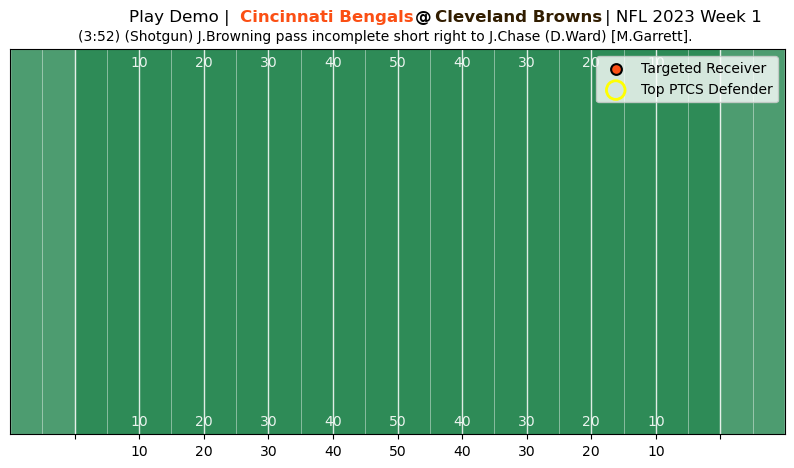

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animate field, player markers, and PTCS checkpoints
pause_times_sec = [0.2, 0.5, 0.7, 1.4]
pause_repeats = 20

EMPTY = np.empty((0, 2))

base_frames = np.array(sorted(play_all['frame_id'].unique()))

catch_df = play_all[play_all['frame_id'] == frame_id_catch]
cov_catch = catch_df[catch_df['player_role'] == 'Defensive Coverage'].copy()
cov_catch['dist_to_land'] = np.sqrt((cov_catch['x'] - x_c) ** 2 + (cov_catch['y'] - y_c) ** 2)

top_defender_id = cov_catch.loc[cov_catch['dist_to_land'].idxmin(), 'nfl_id']
print('Top PTCS Defender NFL ID: ', top_defender_id)

def snap_to_existing_frame(target_frame: int) -> int:
    idx = np.abs(base_frames - target_frame).argmin()
    return int(base_frames[idx])

pause_frames = []

for t in pause_times_sec:
    raw_target = int(round(throw_frame + (t / delta_t)))
    pause_frames.append(snap_to_existing_frame(raw_target))
pause_frames = sorted(set(pause_frames))

frames_for_anim = []
for f in base_frames:
    frames_for_anim.append(int(f))
    if int(f) in pause_frames:
        frames_for_anim.extend([int(f)] * pause_repeats)

fig, ax = plt.subplots(figsize=(10, 5))

#Illustrate field
def set_field(ax):
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_facecolor('#2e8b57')

    for x in range(0, 121, 5):
        lw = 1.0 if x % 10 == 0 else 0.5
        ax.axvline(x, color='white', linewidth=lw, alpha=0.85 if x % 10 == 0 else 0.6, zorder=0)

    ax.axvspan(0, 10, alpha=0.15, color='white', zorder=0)
    ax.axvspan(110, 120, alpha=0.15, color='white', zorder=0)
    ax.set_yticks([])

    tick_positions = list(range(10, 111, 10))
    tick_labels = []
    for x in tick_positions:
        if x in (10, 110):
            tick_labels.append("")
        else:
            yd = min(x - 10, 110 - x)
            tick_labels.append(str(int(yd)))

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)

    for x in range(20, 101, 10):
        yd = int(min(x - 10, 110 - x))
        ax.text(x, 51.5, str(yd), color='white', ha='center', va='center', fontsize=10, alpha=0.9, zorder=1)
        ax.text(x, 1.8, str(yd), color='white', ha='center', va='center', fontsize=10, alpha=0.9, zorder=1)

set_field(ax)

ax.set_title("")

# Title
t_left = fig.text(0.35, 0.96, "Play Demo | ", ha="right", va="top", fontsize=12, color="black")

t_bengals = fig.text(0.355, 0.96, "Cincinnati Bengals", ha="left", va="top", fontsize=12, color="#FB4F14", fontweight="bold")

t_at = fig.text(0.53, 0.96, "@", ha="left", va="top", fontsize=12, color="black", fontweight="bold")

t_browns = fig.text(0.55, 0.96, "Cleveland Browns", ha="left", va="top", fontsize=12, color="#311D00", fontweight="bold")

t_meta = fig.text(0.72, 0.96, f"| NFL {season} Week {week}", ha="left", va="top", fontsize=12, color="black")

# Subtitle
t_sub = fig.text(0.5, 0.92, play_description, ha="center", va="top",
                 fontsize=10, color="black")

# Optional: frame counter that updates
t_frame = fig.text(0.5, 0.885, "", ha="center", va="top",
                   fontsize=9, color="black")

off_scatter = ax.scatter([], [], s=60, color='#FB4F14', edgecolors="#FFFFFF", zorder=3)
def_scatter = ax.scatter([], [], s=60, color='#311D00', edgecolors='#FF3C00', zorder=3)

receiver_scatter = ax.scatter ([], [], s=60, edgecolors = 'black', linewidth = 1.5, label = 'Targeted Receiver', zorder=4, color='#FB4F14')
cov_scatter = ax.scatter([], [], s=180, facecolors='none', edgecolors='yellow', linewidths=2.0, label='Top PTCS Defender')

ptcs_text = ax.text(0, 0, "", color='white', fontsize=9, fontweight='bold', ha='center', va='bottom', zorder=10, bbox=dict(boxstyle='round', alpha=0.35))

ax.legend(loc='upper right')

def init():
    off_scatter.set_offsets(EMPTY)
    def_scatter.set_offsets(EMPTY)
    receiver_scatter.set_offsets(EMPTY)
    ball_scatter.set_offsets(EMPTY)
    cov_scatter.set_offsets(EMPTY)
    ptcs_text.set_text("")
    ptcs_text.set_position((0, 0))
    t_frame.set_text("")
    return off_scatter, def_scatter, receiver_scatter, ball_scatter, cov_scatter, ptcs_text

def update(frame):
    frame_data = play_all[play_all['frame_id'] == frame]

    off_data = frame_data[frame_data['player_side'] == 'Offense']
    def_data = frame_data[frame_data['player_side'] == 'Defense']

    off_scatter.set_offsets(off_data[['x', 'y']].values if not off_data.empty else EMPTY)
    def_scatter.set_offsets(def_data[['x', 'y']].values if not def_data.empty else EMPTY)

    receiver_data = frame_data[frame_data['player_role'] == 'Targeted Receiver']
    receiver_scatter.set_offsets(receiver_data[['x', 'y']].values if not receiver_data.empty else EMPTY)

    # Highlight chosen defender + show PTCS above head
    cov_row = frame_data[frame_data['nfl_id'] == top_defender_id]
    if not cov_row.empty:
        x_d = float(cov_row['x'].iloc[0])
        y_d = float(cov_row['y'].iloc[0])
        cov_scatter.set_offsets([[x_d, y_d]])

        ptcs_val = cov_row['ptcs'].iloc[0] if 'ptcs' in cov_row.columns else np.nan
        if np.isfinite(ptcs_val):
            ptcs_text.set_text(f"PTCS: {ptcs_val:.2f}")
        else:
            ptcs_text.set_text("PTCS: N/A")

        # Offset above head
        ptcs_text.set_position((x_d, y_d + 2.0))

        # Subtle emphasis on pause frames
        if frame in pause_frames:
            ptcs_text.set_fontsize(13)
            ptcs_text.set_bbox(dict(boxstyle="round", alpha=0.50))
        else:
            ptcs_text.set_fontsize(11)
            ptcs_text.set_bbox(dict(boxstyle="round", alpha=0.35))
    else:
        cov_scatter.set_offsets(EMPTY)
        ptcs_text.set_text("")

    t_frame.set_text(f"Frame {frame}")

    return off_scatter, def_scatter, receiver_scatter, ball_scatter, cov_scatter, ptcs_text, t_frame





In [ ]:
# Verify coverage players when the ball reaches catch point
cov_players = play_all[play_all['player_role'] == 'Defensive Coverage'][['nfl_id', 'player_name', 'player_position']].drop_duplicates().sort_values('player_name')

print(cov_players)

      nfl_id              player_name player_position
316  46073.0              Denzel Ward              CB
0        NaN              Denzel Ward              CB
7        NaN             Grant Delpit              SS
315  53481.0  Jeremiah Owusu-Koramoah             OLB
4        NaN  Jeremiah Owusu-Koramoah             OLB
2        NaN           Martin Emerson              CB
312  38843.0            Rodney McLeod              FS
3        NaN            Rodney McLeod              FS
313  42465.0          Za'Darius Smith              DE
6        NaN          Za'Darius Smith              DE


    frame_id  t_sec      ptcs
0         27    0.0  0.000000
1         28    0.1  0.022135
2         29    0.2  0.144427
3         30    0.3  0.314536
4         31    0.4  0.877487
5         32    0.5  0.898199
6         33    0.6  0.458674
7         34    0.7  0.157697
8         35    0.8  0.242863
9         36    0.9  0.629586
10        37    1.0  0.774243
11        38    1.1  0.811358
12        39    1.2  0.898539
13        40    1.3  0.906503
14        41    1.4  0.932661


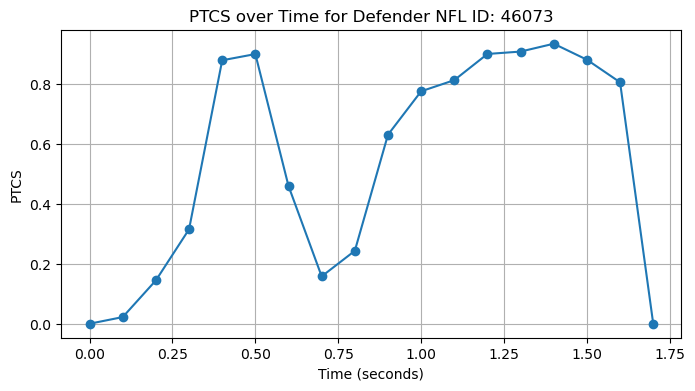

In [ ]:
#Looking at the frame id of target defender and how the PTCS moves over the play in a table.
def_id = 46073
delta_t = 0.1

df_d = (play_all[(play_all['nfl_id'] == def_id) & (play_all['player_role'] == 'Defensive Coverage')].copy())

df_d = df_d[df_d['ptcs'].notna()].sort_values('frame_id')

df_d = df_d.reset_index(drop=True)
df_d['t_sec'] = np.arange(len(df_d)) * delta_t

print(df_d[['frame_id', 't_sec', 'ptcs']].head(15))

plt.figure(figsize=(8, 4))
plt.plot(df_d['t_sec'], df_d['ptcs'], marker='o')
plt.title(f'PTCS over Time for Defender NFL ID: {def_id}')
plt.xlabel('Time (seconds)')
plt.ylabel('PTCS')
plt.grid()
plt.show()

In [ ]:
# Looking at how the TTC is developing throughout the play in comparison to space and time
df_dbg = (play_all[(play_all['nfl_id'] == def_id) & (play_all['player_role'] == 'Defensive Coverage')].copy().sort_values('frame_id'))

rows = []
for _, row in df_dbg.iterrows():
    frame = row['frame_id']
    if frame >= frame_id_catch:
        continue

    x_d, y_d, s_d = row['x'], row['y'], row['s']
    frames_to_catch = frame_id_catch - frame
    time_to_catch = frames_to_catch * delta_t
    r = np.sqrt((x_c - x_d) ** 2 + (y_c - y_d) ** 2)
    TTC = r / max(s_d, 1e-3)

    rows.append((frame, r, s_d, time_to_catch, TTC))

dbg_df = pd.DataFrame(rows, columns=['frame_id', 'r', 's_d', 'time_to_catch', 'TTC'])
print(dbg_df.head(20))



    frame_id         r       s_d  time_to_catch          TTC
0         27  4.073035  0.000000            1.7  4073.034509
1         28  4.101575  4.964877            1.6     0.826118
2         29  4.143648  4.346263            1.5     0.953382
3         30  4.180194  4.254409            1.4     0.982556
4         31  4.198157  3.500000            1.3     1.199473
5         32  4.188009  3.324154            1.2     1.259872
6         33  4.115352  3.041381            1.1     1.353119
7         34  4.031504  2.879236            1.0     1.400199
8         35  3.877696  3.106445            0.9     1.248274
9         36  3.583535  3.624914            0.8     0.988585
10        37  3.267418  3.935734            0.7     0.830193
11        38  2.926178  4.104875            0.6     0.712854
12        39  2.537345  4.534314            0.5     0.559587
13        40  2.144019  4.738143            0.4     0.452502
14        41  1.660756  5.903389            0.3     0.281323
15        42  1.326993  

In [ ]:
# Run animation
from IPython.display import HTML

anim = FuncAnimation(fig, update, frames=frames_for_anim, init_func=init, blit=True, interval=80)

HTML(anim.to_jshtml())

In [ ]:
# Save GIF
from matplotlib.animation import PillowWriter

gif_path = 'ptcs_checkpoint_demo.gif'

writer = PillowWriter(fps=12)
anim.save(gif_path, writer=writer)

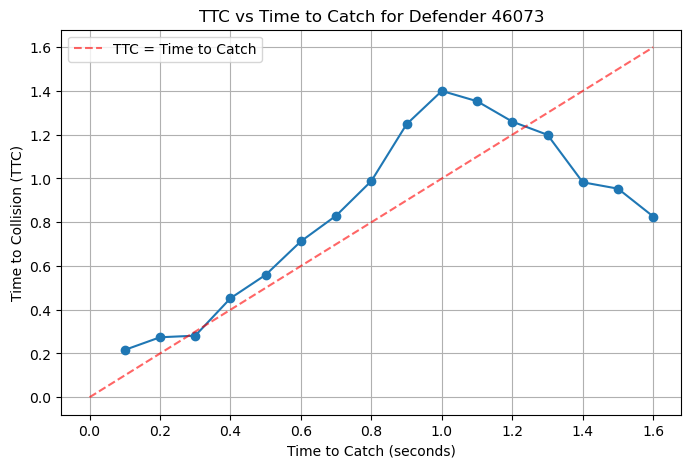

In [ ]:
# Produce graph to explore TTC's interaction with time across the play
dbg_df = dbg_df.drop(0)

plt.figure(figsize=(8, 5))

plt.plot(dbg_df['time_to_catch'], dbg_df['TTC'], marker='o')
plt.xlabel('Time to Catch (seconds)')
plt.ylabel('Time to Collision (TTC)')
plt.title(f'TTC vs Time to Catch for Defender {def_id}')
plt.grid(True)

max_t = max(dbg_df['time_to_catch'].max(), dbg_df['TTC'].max())
plt.plot([0, max_t], [0, max_t], '--', color='red', alpha=0.6, label='TTC = Time to Catch')
plt.legend()

plt.show()

In [ ]:
# Explore the frame PTCS windows around the catch

def_id = 46073
delta_t = 0.1
df_d = (play_all[(play_all['nfl_id'] == def_id) & (play_all['player_role'] == 'Defensive Coverage')].copy().sort_values('frame_id'))

window_pre_sec = 0.3
window_post_sec = 0.1

window_pre_frames = int(round(window_pre_sec / delta_t))
window_post_frames = int(round(window_post_sec / delta_t))   

frame_min = frame_id_catch - window_pre_frames
frame_max = frame_id_catch + window_post_frames

df_win = df_d[(df_d['frame_id'] >= frame_min) & (df_d['frame_id'] <= frame_max) & (df_d['ptcs'].notna())].copy()

print( def_id, ' window around the catch: ')
print(df_win[['frame_id', 'ptcs']])



46073  window around the catch: 
     frame_id      ptcs
385        41  0.932661
390        42  0.879394
392        43  0.804166
398        44  0.000000


In [ ]:
# Explore the frame at which the PTCS peaks

if df_win.empty:
    raise ValueError('No PTCS values for defender in the catch window.')

row_peak = df_win.loc[df_win['ptcs'].idxmax()]

ptcs_peak = row_peak['ptcs']
frame_peak = int(row_peak['frame_id'])

delta_frames_star = frame_peak - frame_id_catch
delta_t_star = delta_frames_star * delta_t

print(f'PTCS_peak: {ptcs_peak:.6e}')
print(f'Peak frame: {frame_peak} (catch frame = {frame_id_catch})')
print(f'Delta_t_star (seconds): {delta_t_star:+.3f}')

PTCS_peak: 9.326607e-01
Peak frame: 41 (catch frame = 44)
Delta_t_star (seconds): -0.300


In [ ]:
# Explore timing grade for the targeted defender
tau_grade = 0.15

timing_multiplier = np.exp(- (delta_t_star / tau_grade) ** 2)
perfect_timing_grade = ptcs_peak * timing_multiplier

print(f'Timing Multiplier: {timing_multiplier:.6f}')
print(f'Perfect Timing Grade: {perfect_timing_grade:.6f}')

Timing Multiplier: 0.018316
Perfect Timing Grade: 0.017082
